In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from collections import defaultdict
import os

In [2]:
event_files = glob(os.path.join("runs", "storm_training" , "events.out.tfevents.*"))

if not event_files:
    raise ValueError(f"No event files found")
    
# Dictionary to store results
results = defaultdict(list)
scalar_keys = None
# Process each event file
for event_file in event_files:
    # Initialize event accumulator
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()  # Load all data
    
    # Get list of scalar tags (metrics)
    tags = event_acc.Tags()["scalars"]
    
    # Filter tags if specific keys are requested
    if scalar_keys is not None:
        tags = [t for t in tags if t in scalar_keys]
        
    # Extract data for each tag
    for tag in tags:
        events = event_acc.Scalars(tag)
        
        # Extract step and value, ignore wall_time
        for event in events:
            results[tag].append((event.step, event.value))
    break

# Convert lists to numpy arrays
for tag in results:
    results[tag] = np.array(results[tag])
    

In [3]:
results["Loss/train_epoch"]

array([[0.00000000e+00, 1.97068558e+01],
       [1.00000000e+00, 1.93813915e+01],
       [2.00000000e+00, 1.86565781e+01],
       [3.00000000e+00, 1.73020782e+01],
       [4.00000000e+00, 1.53313351e+01],
       [5.00000000e+00, 1.30410080e+01],
       [6.00000000e+00, 1.09812794e+01],
       [7.00000000e+00, 1.06663818e+01],
       [8.00000000e+00, 1.00425682e+01],
       [9.00000000e+00, 9.57874966e+00],
       [1.00000000e+01, 1.00507526e+01],
       [1.10000000e+01, 1.00212946e+01],
       [1.20000000e+01, 9.59729958e+00],
       [1.30000000e+01, 9.23427486e+00],
       [1.40000000e+01, 8.67406368e+00],
       [1.50000000e+01, 7.74498081e+00],
       [1.60000000e+01, 6.89232016e+00],
       [1.70000000e+01, 6.09339952e+00],
       [1.80000000e+01, 4.97837448e+00],
       [1.90000000e+01, 3.40032506e+00],
       [2.00000000e+01, 1.89520586e+00],
       [2.10000000e+01, 1.26845539e+00],
       [2.20000000e+01, 1.36163056e+00],
       [2.30000000e+01, 1.43752396e+00],
       [2.400000

In [4]:
epoch, loss =  results["Loss/train_epoch"][:, 0], results["Loss/train_epoch"][:, 1]

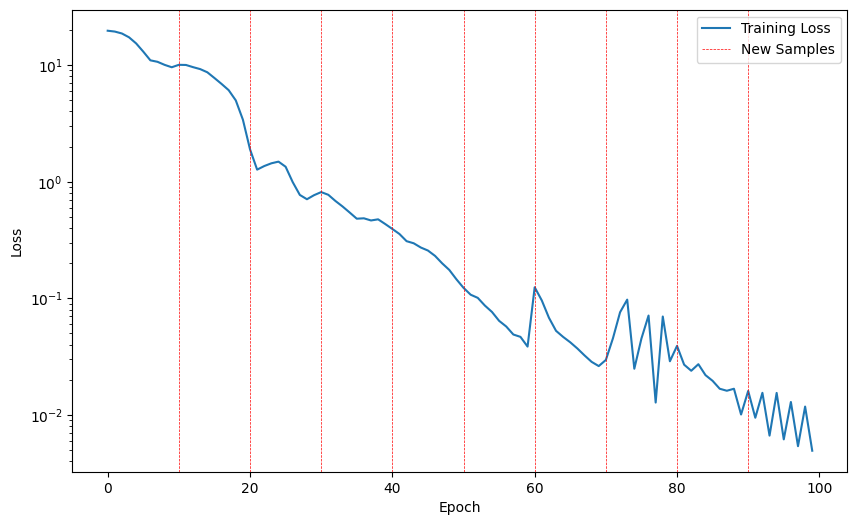

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label="Training Loss")
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add vertical lines at every 10th epoch excluding the 0th
for i in range(10, len(loss), 10):
    if i == 10:
        plt.axvline(x=i, color='r', linestyle='--', linewidth=0.5, label="New Samples")
    else:
        plt.axvline(x=i, color='r', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()